In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import pywt

### Read File


In [2]:
data, fs = librosa.load("audio.mp3")

In [3]:
len(data) / fs  # duration in seconds: 1min 46s

106.08326530612244

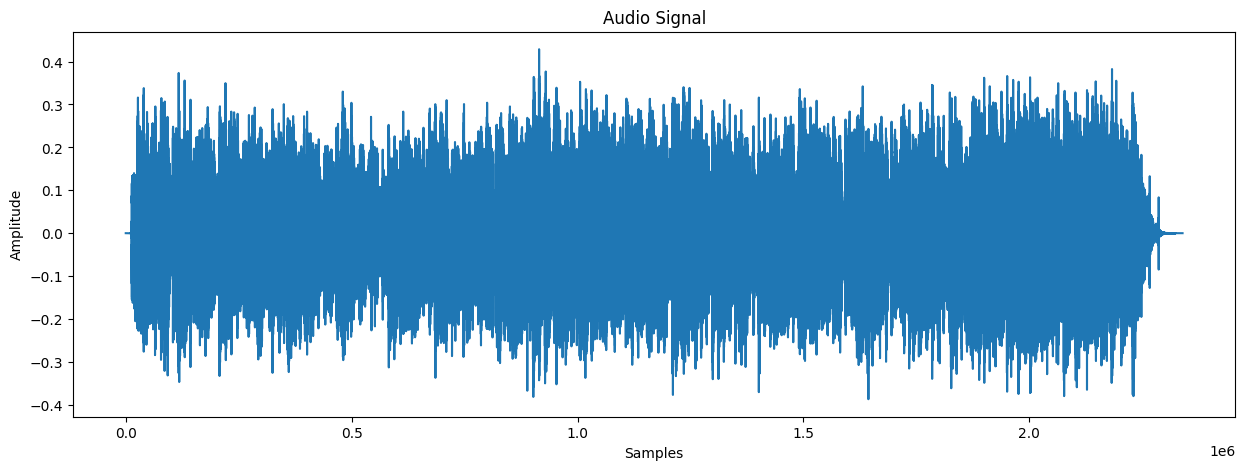

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.title("Audio Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

### Cut file


In [5]:
size_in_seconds = 10
size_in_samples = size_in_seconds * fs

In [6]:
data = data[:size_in_samples]

### DTW


#### Wavelet


In [7]:
wavelet = pywt.Wavelet("db4")

In [8]:
[phi, psi, x] = wavelet.wavefun(level=8)

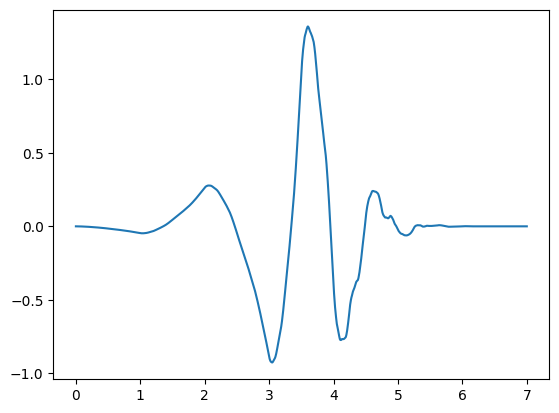

In [9]:
plt.plot(x, psi)
plt.show()

In [10]:
print(wavelet)

Wavelet db4
  Family name:    Daubechies
  Short name:     db
  Filters length: 8
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


#### Decomposição com DB4 e 8 níveis


In [11]:
data_decomp = pywt.wavedec(data, wavelet, level=8)

In [12]:
len(data_decomp)

9

In [13]:
coef_aprox, *coef_details = data_decomp

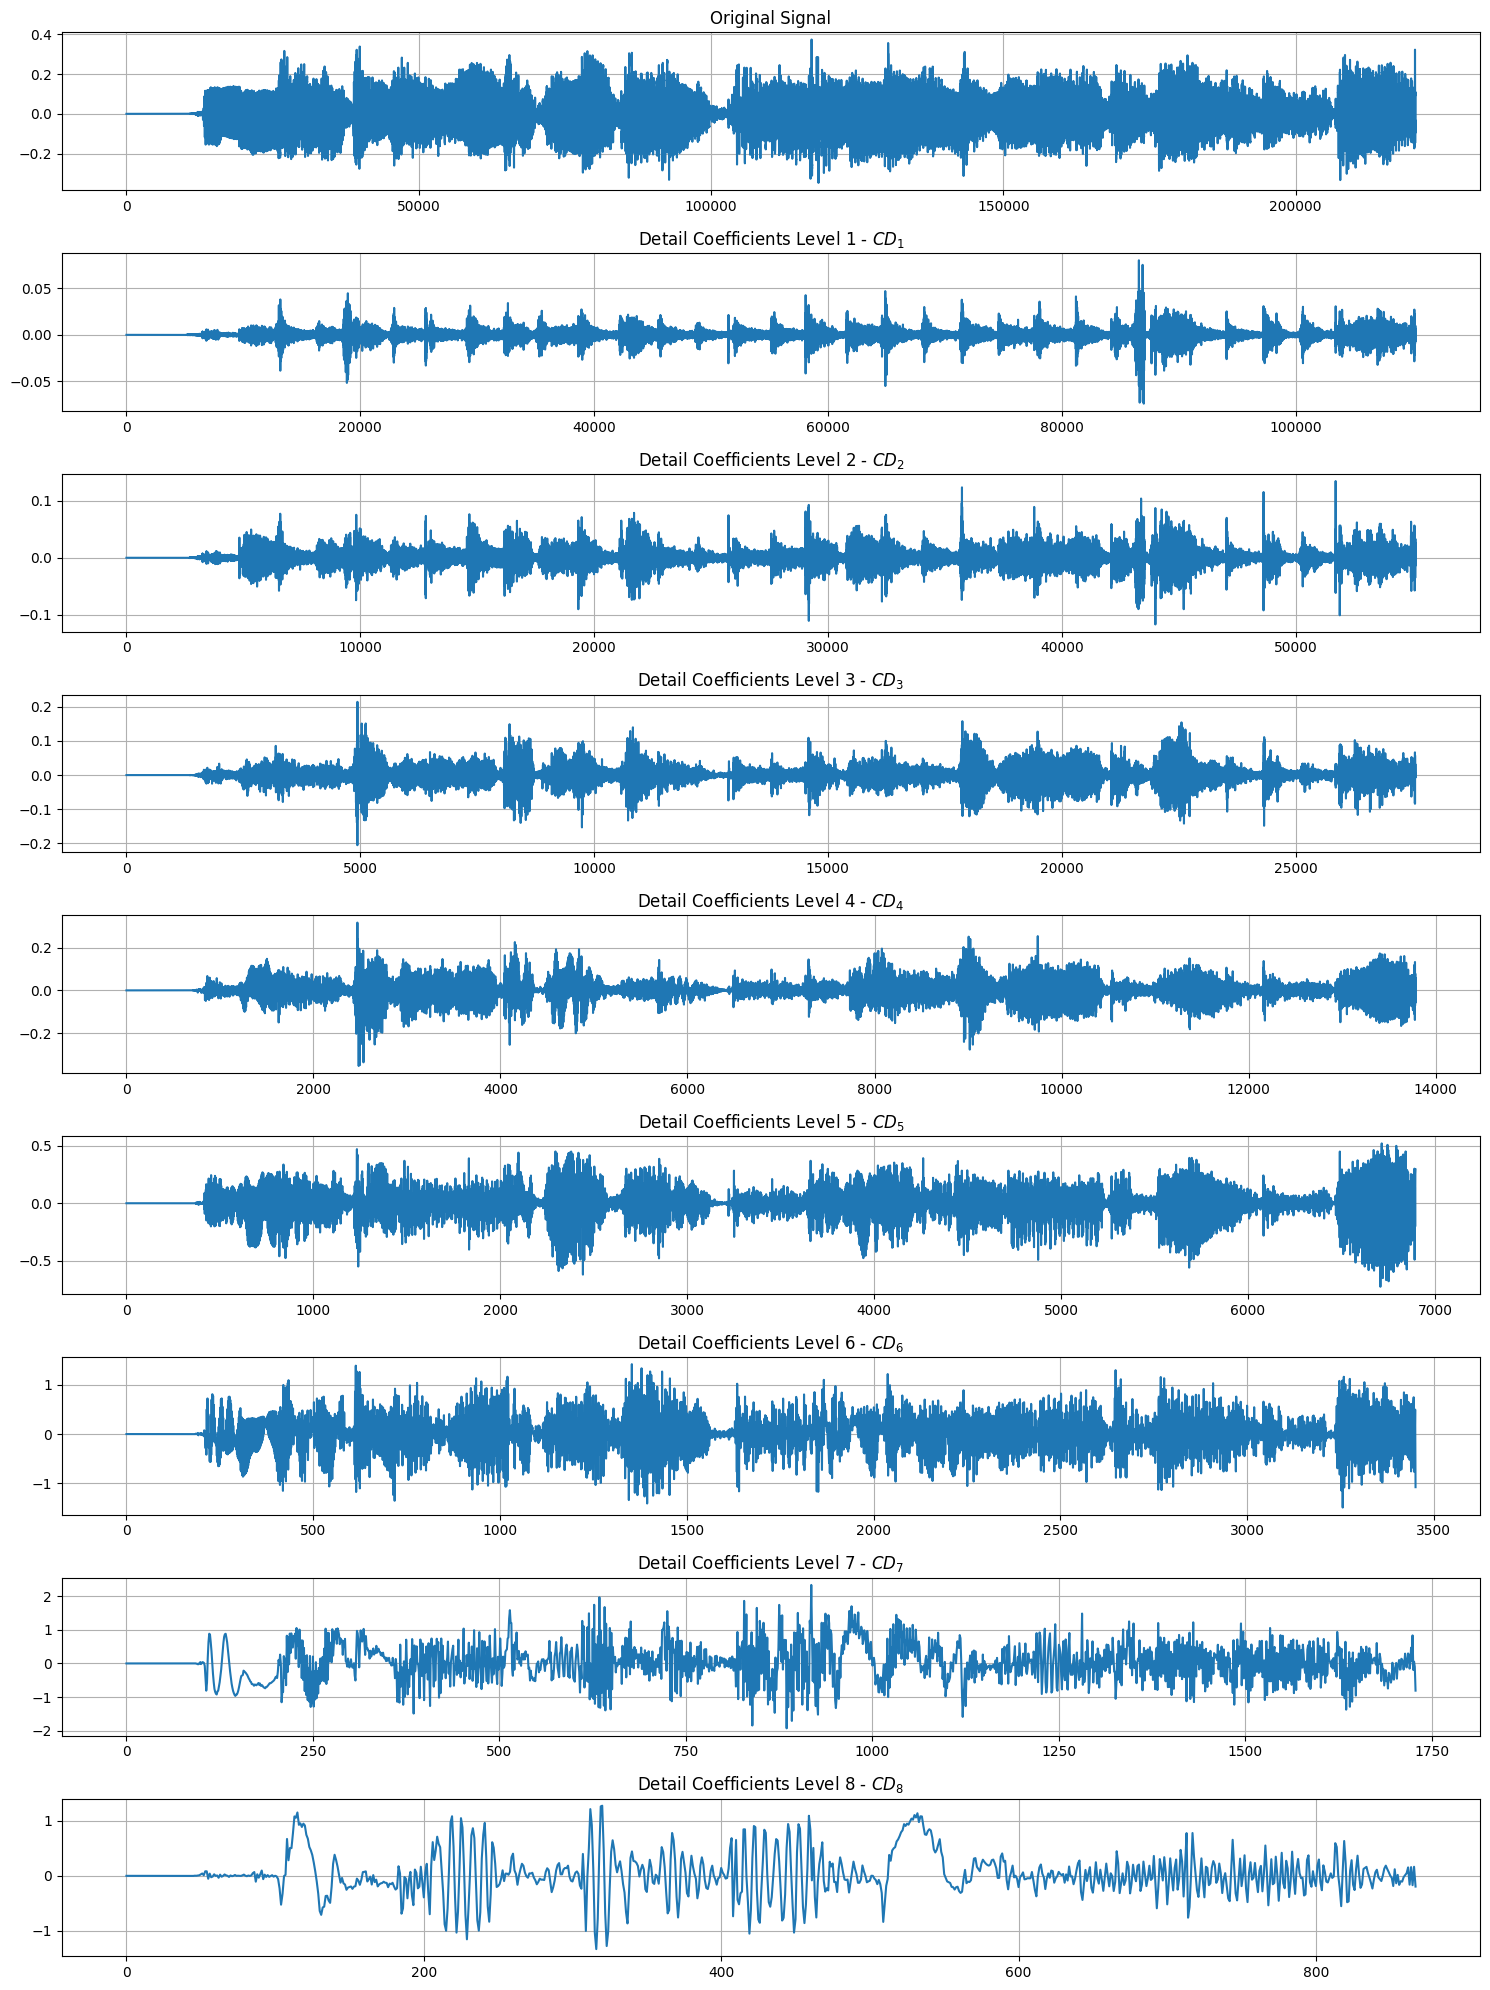

In [14]:
fig, ax = plt.subplots(len(coef_details) + 1, 1, figsize=(15, 20))
ax[0].plot(data)
ax[0].set_title("Original Signal")
ax[0].grid()
for i, coef in enumerate(coef_details[::-1]):
    ax[i + 1].plot(coef)
    ax[i + 1].set_title(f"Detail Coefficients Level {i+1} - $CD_{i+1}$")
    ax[i + 1].grid()

plt.tight_layout()

A transformada wavelet decompõe o sinal em níveis de detalhe em função da frequência, iniciando das mais altas para as menores. Uma maneira de analisar a influência de cada frequência no sinal é analisando a amplitude das contribuições. <br>

Nota-se dessa forma que d1, mais alta frequência, possivelmente ligada à ruídos possui baixa influência no nosso sinal. As frequencia médias de d2 a d5 possuem uma influência razoável no sinal original e forma de onda também é bem similar. <br>

Contudo, é possível observar que a a cd7 possui a maior influência, mostrando uma predominância das das baixas frequências no sinal, como também podemos confirmar pela stft. <br>

In [15]:
pywt.wavelist(kind="discrete")

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

#### Decomposição com Sym6 e 8 níveis


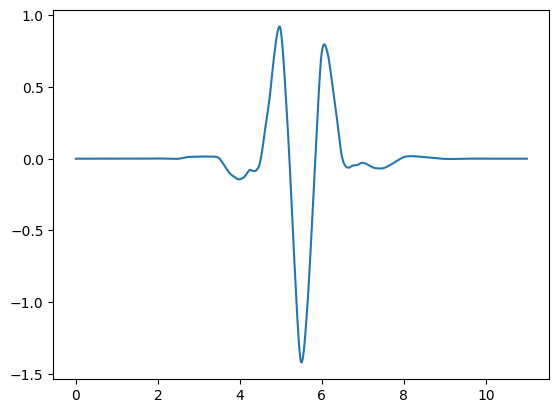

In [16]:
wavelet = pywt.Wavelet("sym6")
[phi, psi, x] = wavelet.wavefun(level=8)
plt.plot(x, psi)
plt.show()

In [17]:
data_decomp = pywt.wavedec(data, wavelet, level=8)
coef_aprox, *coef_details = data_decomp

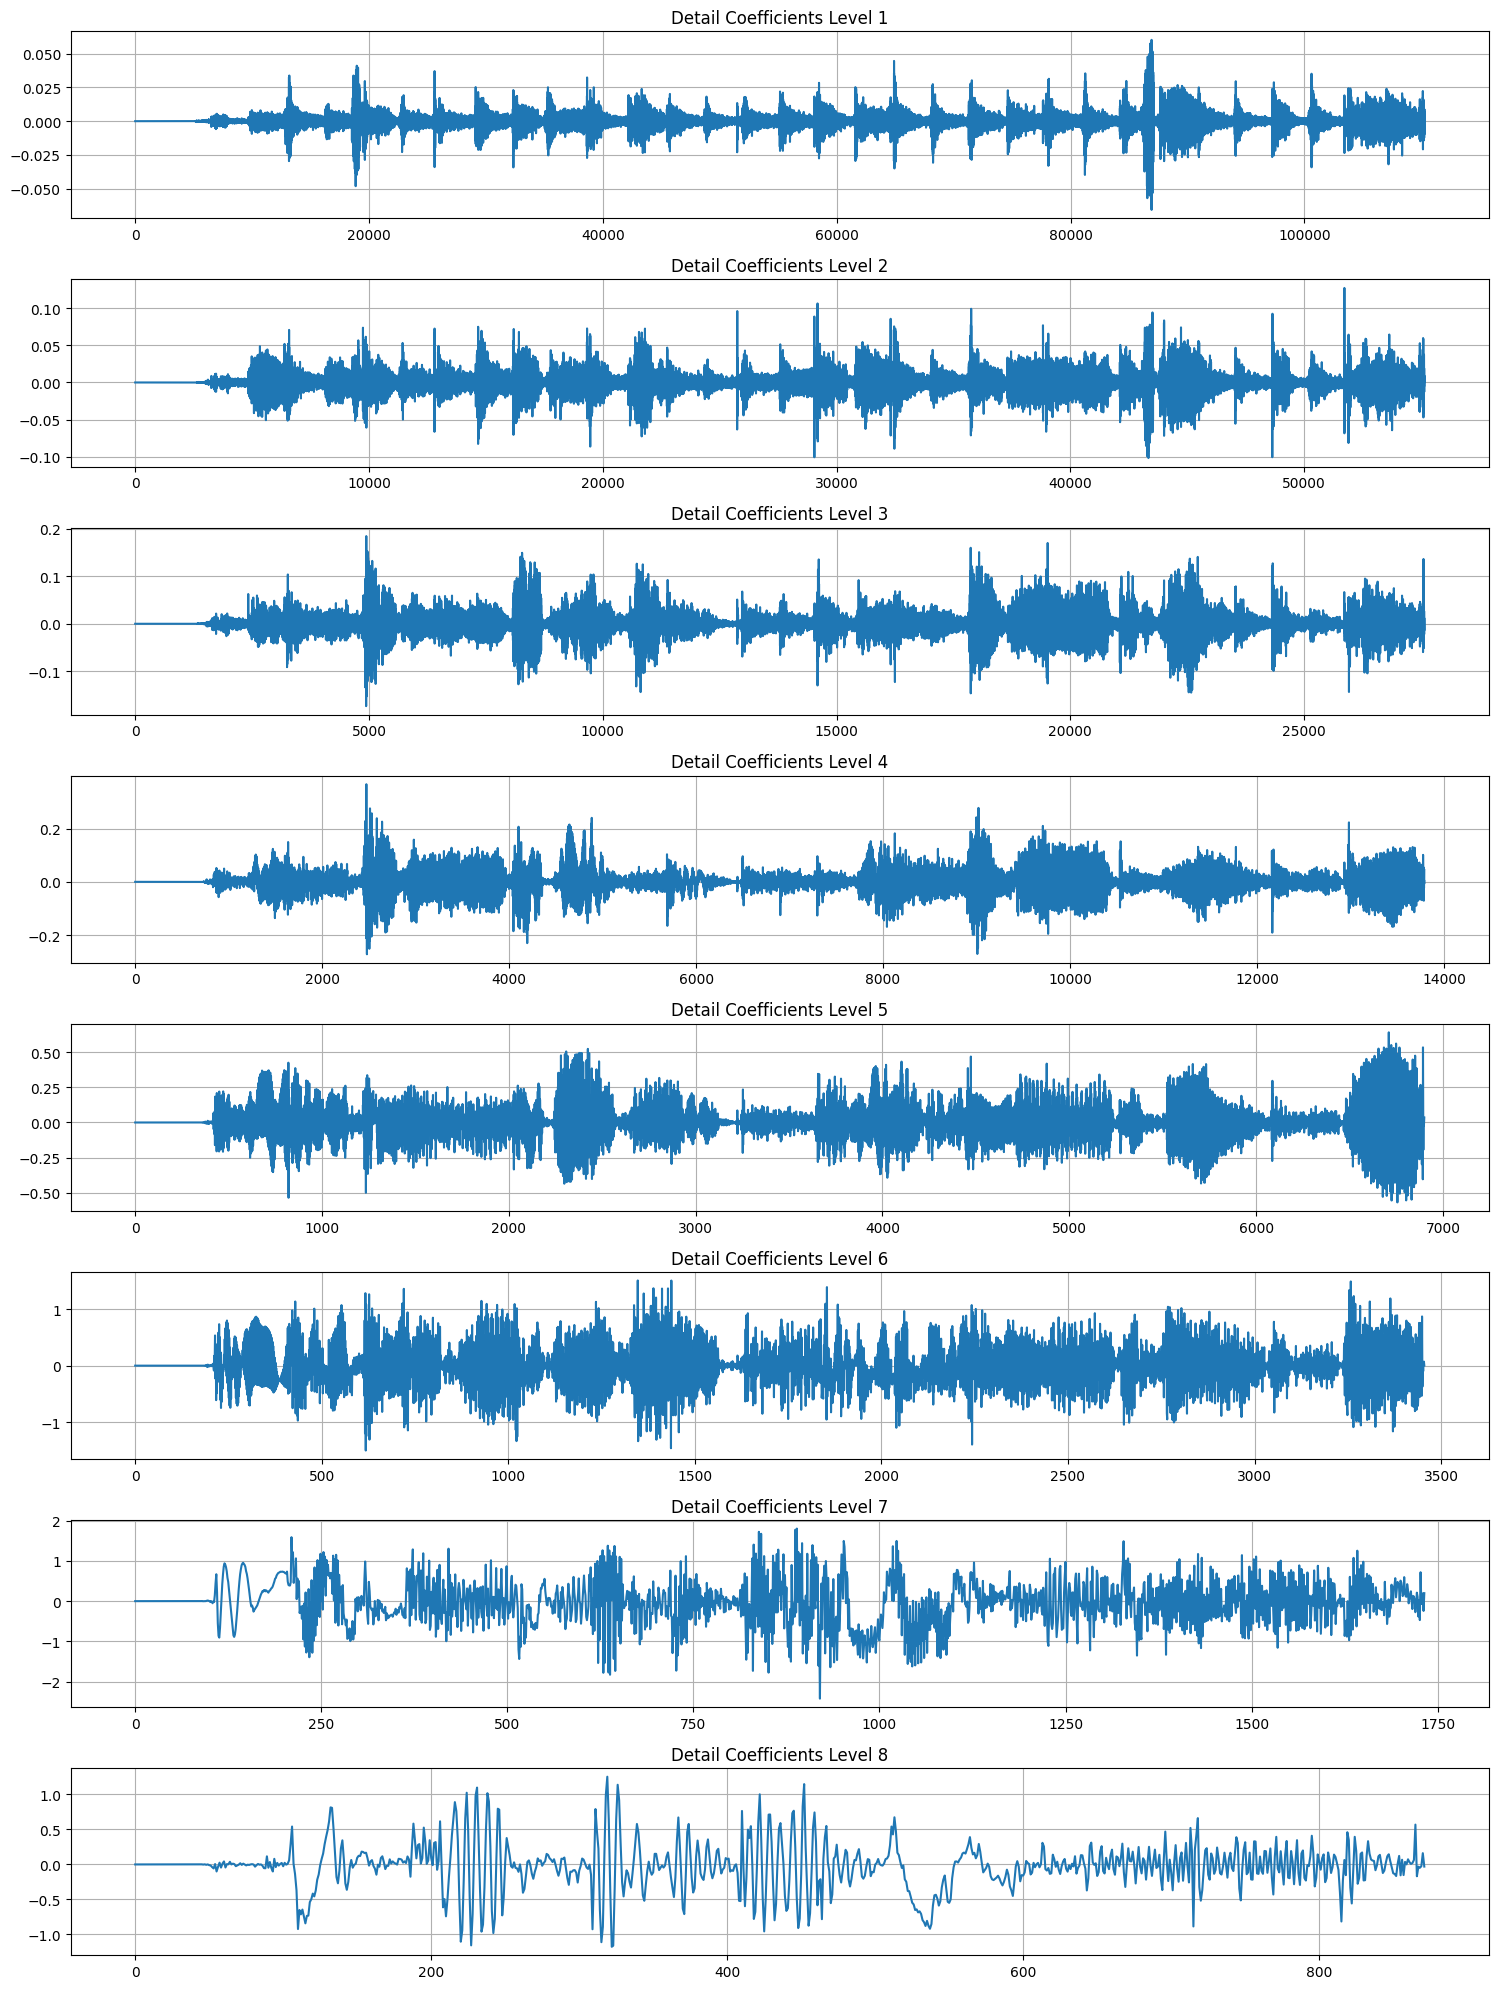

In [18]:
fig, ax = plt.subplots(len(coef_details), 1, figsize=(15, 20))
for i, coef in enumerate(coef_details[::-1]):
    ax[i].plot(coef)
    ax[i].set_title(f"Detail Coefficients Level {i+1}")
    ax[i].grid()

plt.tight_layout()